# Project Overview
- We have a dataset from the moview review website RottenTomatoes.com.
- The dataset includes written reviews on movies, the names of each critic, review date, and a verdict of whether of not a movie was consider "Fresh" (positive review) or "Rotten" (negative review).
- The goal of this project is to use the text in each review to create a model to predict whether or not a review is considered "Fresh" or "Rotten" based solely on the information extracted from the text review alone.

In [57]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

In [2]:
# Loading in dataset
df = pd.read_csv('reviews.tsv', sep='\t', encoding = 'ISO-8859-1')
df.head()

# Exploratory Data Analysis
- For our movie review classification, we will stick with the Rotten Tomoatoes benchmark of "Fresh" vs "Rotten".
- This is a simpler task than predicting a rating as many of the critics appear to use their own metrics (e.g. numeric rating system out of 4, 5 or out of 10. Other critics use a letter grade system.

In [55]:
# Way too many types of reviews from critics with each reviewer using their own set of review rating system
print('List of Reviews:')
print(df['rating'].unique())
print('\n')
print('Number of unique reviews:')
print(df['rating'].nunique())

List of Reviews:
['3/5' nan 'C' '2/5' 'B-' '2/4' 'B' '3/4' '4/5' '4/4' '6/10' '1/4' '8'
 '2.5/4' '4/10' '2.0/5' '3/10' '7/10' 'A-' '5/5' 'F' '3.5/4' 'D+' '1.5/4'
 '3.5/5' '8/10' 'B+' '9/10' '2.5/5' '7.5/10' '5.5/10' 'C-' '1.5/5' '1/5'
 '5/10' 'C+' '0/5' '6' '0.5/4' 'D' '3.1/5' '3/6' '0/4' '2/10' '7' '3' 'A+'
 'A' '4.5/5' '4.0/4' '9.5/10' '2.5' '2.1/2' '6.5/10' '3.7/5' '8.4/10' '9'
 '1' '7.2/10' '2.2/5' '0.5/10' '5' '0' '2' '1/10' '4.5' '7.7' '5.0/5'
 '8.5/10' '3.0/5' '0.5/5' '1.5/10' '3.0/4' '2.3/10' '4.5/10' '4/6' '3.5'
 '8.6/10' '6/8' 'D-' '2.0/4' '2.7' '4.2/10' '5.8' '4' '7.1/10' 'N'
 '3.5/10' '5.8/10' 'R' '4.0/5' '0/10' '5.0/10' '5.9/10' '2.4/5' '1.9/5'
 '4.9' '7.4/10' '1.5' '2.3/4' '8.8/10' '4.0/10' '2.2' '3.8/10' '6.8/10'
 '7.3' '7.0/10' '3.2' '4.2' '8.4' '5.5/5' '6.3/10' '7.6/10' '8.1/10'
 '3.6/5' '2/6' '7.7/10' '1.8' '8.9/10' '8.9' '8.2/10' '8.3/10' '2.6/6'
 '4.1/10' '2.5/10' 'F+' '6.0/10' '1.0/4' '7.9/10' '8.7/10' '4.3/10'
 '9.6/10' '9.0/10' '4.0' '1.7' '7.9' '6.7' '8.0/10' '9

In [56]:
# We'll stick with Rotten Tomatoes' final review classification of "Fresh" vs. "Rotten" when training our model
df['fresh'].value_counts()

fresh     29876
rotten    18993
Name: fresh, dtype: int64

In [6]:
df['fresh'].unique()

array(['fresh', 'rotten'], dtype=object)

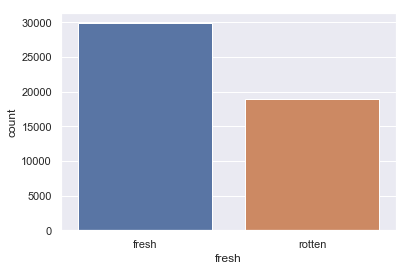

In [58]:
# Distribution of "Fresh" vs "Rotten" reviews are roughly balanced. 
sns.countplot(df['fresh'])
plt.show()

In [7]:
# Checking for missing values
df.isnull().sum()

id                0
review         5563
rating        13517
fresh             0
critic         2722
top_critic        0
publisher       309
date              0
dtype: int64

In [8]:
# Since we cannot work with missing data or find a viable way to replace missing text reviews, we will drop these missings rows under reviews.
df = df.dropna(subset=['review'])

In [9]:
df.isnull().sum()

id                0
review            0
rating        13490
fresh             0
critic         1930
top_critic        0
publisher       309
date              0
dtype: int64

In [10]:
df.describe(include='all')

,id,review,rating,fresh,critic,top_critic,publisher,date
count,48869.000000,48869,35379,48869,46939,48869.000000,48560,48869
unique,NaN,48682,185,2,3457,NaN,1276,5789
top,NaN,Parental Content Review,3/4,fresh,Dennis Schwartz,NaN,New York Times,"January 1, 2000"
freq,NaN,24,3324,29876,413,NaN,580,3394
mean,1051.236735,NaN,NaN,NaN,NaN,0.253248,NaN,NaN
std,584.905230,NaN,NaN,NaN,NaN,0.434876,NaN,NaN
min,3.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
25%,559.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
50%,1084.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
75%,1542.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN


In [11]:
df_fresh = df[['fresh', 'review']]

In [12]:
# Checking for reviews with no text in review
blank_reviews = []

# (index, label, review text)
for i, label, review in df_fresh.itertuples():
    if type(review) == str:
        if review.isspace():
            blank_reviews.append(i)

In [13]:
# All remaining reviews contain text
blank_reviews

[]

In [69]:
# Addining in a new feature to see if there is any correlation to the length of the review to the fresh rating.
df_fresh['review length'] = df_fresh['review'].apply(lambda review: len(review))

E:\Users\Charles\Anaconda3\envs\nlp_course\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [70]:
df_fresh.head()

,fresh,review,review length
0,fresh,A distinctly gallows take on contemporary fina...,168
1,rotten,It's an allegory in search of a meaning that n...,102
2,fresh,... life lived in a bubble in financial dealin...,232
3,fresh,Continuing along a line introduced in last yea...,234
4,fresh,... a perverse twist on neorealism...,38


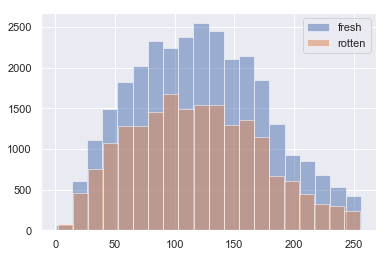

In [88]:
bins = 20
plt.hist(df_fresh[df_fresh['fresh']=='fresh']['review length'],bins=bins,alpha=0.5)
plt.hist(df_fresh[df_fresh['fresh']=='rotten']['review length'],bins=bins,alpha=0.5)
plt.legend(('fresh','rotten'))
plt.show()

- Not a clear trend to see if the length of reviews has any relation to the movie review.
- The distribution of review length looks pretty similar between "Fresh" movies and "Rotten" movies.

# Model Selection
- Feature extraction of the text reviews was performed using TfidfVectorizer.
- The classification models evaluated include:
- LinearSVC
- Logistic Regression Model
- XGBoost
- Random Forest


In [14]:
# Splitting data into training and testing datasets
from sklearn.model_selection import train_test_split

X = df_fresh['review']
y = df_fresh['fresh']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**Linear SVC**

In [15]:
# Building a simple pipeline to preprocess text data
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

text_clf_svc = Pipeline([('tfidf', TfidfVectorizer()),
                    ('clf', LinearSVC())])

In [19]:
# Fitting and generating predictions
text_clf_svc.fit(X_train, y_train)
y_pred_svc = text_clf_svc.predict(X_test)

In [90]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test, y_pred_svc))
print(confusion_matrix(y_test, y_pred_svc))

              precision    recall  f1-score   support

       fresh       0.81      0.84      0.82      8932
      rotten       0.74      0.68      0.71      5729

    accuracy                           0.78     14661
   macro avg       0.77      0.76      0.77     14661
weighted avg       0.78      0.78      0.78     14661

[[7545 1387]
 [1819 3910]]


**Logistic Regression**

In [21]:
from sklearn.linear_model import LogisticRegression
# Building pipeline
text_clf_lr = Pipeline([('tfidf', TfidfVectorizer()),
                    ('clf', LogisticRegression())])
# Fitting and generating predictions
text_clf_lr.fit(X_train, y_train)
y_pred_lr = text_clf_lr.predict(X_test)

In [22]:
print(classification_report(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))

              precision    recall  f1-score   support

       fresh       0.78      0.88      0.83      8932
      rotten       0.76      0.62      0.69      5729

    accuracy                           0.78     14661
   macro avg       0.77      0.75      0.76     14661
weighted avg       0.78      0.78      0.77     14661

[[7821 1111]
 [2162 3567]]


**XGBoost**

In [23]:
from xgboost import XGBClassifier
# Building pipeline
text_clf_xgb = Pipeline([('tfidf', TfidfVectorizer()),
                    ('clf', XGBClassifier())])
# Fitting and generating predictions
text_clf_xgb.fit(X_train, y_train)
y_pred_xgb = text_clf_xgb.predict(X_test)

In [24]:
print(classification_report(y_test, y_pred_xgb))
print(confusion_matrix(y_test, y_pred_xgb))

              precision    recall  f1-score   support

       fresh       0.65      0.96      0.77      8932
      rotten       0.77      0.18      0.29      5729

    accuracy                           0.66     14661
   macro avg       0.71      0.57      0.53     14661
weighted avg       0.69      0.66      0.59     14661

[[8619  313]
 [4700 1029]]


**Random Forest Classifier**

In [25]:
from sklearn.ensemble import RandomForestClassifier
# Building pipeline
text_clf_rf = Pipeline([('tfidf', TfidfVectorizer()),
                    ('clf', RandomForestClassifier())])
# Fitting and generating predictions
text_clf_rf.fit(X_train, y_train)
y_pred_rf = text_clf_rf.predict(X_test)

In [27]:
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))

              precision    recall  f1-score   support

       fresh       0.70      0.92      0.79      8932
      rotten       0.75      0.38      0.50      5729

    accuracy                           0.71     14661
   macro avg       0.73      0.65      0.65     14661
weighted avg       0.72      0.71      0.68     14661

[[8221  711]
 [3562 2167]]


# Model Comparisons

In [106]:
model_performance = [accuracy_score(y_test, y_pred_svc),accuracy_score(y_test, y_pred_lr),accuracy_score(y_test, y_pred_xgb),accuracy_score(y_test, y_pred_rf)]
models = ['Linear SVC', 'Logistic Regression', 'XGBoost', 'Random Forest']
df_model = pd.DataFrame(model_performance, columns=['Accuracy'])
df_model['Model'] = models
df_model

,Accuracy,Model
0,0.781325,Linear SVC
1,0.776755,Logistic Regression
2,0.658072,XGBoost
3,0.708546,Random Forest


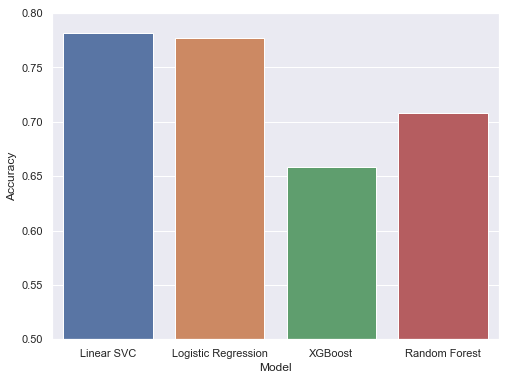

In [107]:
plt.figure(figsize=(8,6))
plt.ylim(0.5,0.8)
sns.barplot(x='Model', y='Accuracy', data=df_model)
plt.show()

- The top two performers were the linear SVC and logistic regression models.
- Ensemble tree based models don't appear to be that great.
- Surprisingly the XGBoost model performed worse than the normal random forest model, and the worst out of the four models.

# Sample Predictions
- We will use the linear SVC model for the sample predictions.
- Randomly selected reviews from the testing data will be used for these predictions.

**Sample Prediction 1**

In [132]:
np.random.seed(42)
rand_sample_1 = int(np.random.randint(0, len(X_test), size=1))
list(X_test)[rand_sample_1]

'As a work of cinema, The Passion of the Christ possesses a majestic beauty within its horror, one that comes most effectively through a tiny, solitary teardrop.'

In [143]:
y_pred_1 = text_clf_svc.predict([list(X_test)[rand_sample_1]])
y_pred_1

array(['fresh'], dtype=object)

In [151]:
df[df['review'] == 'As a work of cinema, The Passion of the Christ possesses a majestic beauty within its horror, one that comes most effectively through a tiny, solitary teardrop.']['fresh']

26760    fresh
Name: fresh, dtype: object

- Model Predition: 'fresh'
- True Result: 'fresh'

**Sample Prediction 2**

In [144]:
np.random.seed(43)
rand_sample_2 = int(np.random.randint(0, len(X_test), size=1))
list(X_test)[rand_sample_2]

'A character-driven dramedy with equal parts humor and heart, Safety Not Guaranteed is a magical film about the human spirit whose charm is impossible to ignore.'

In [145]:
y_pred_2 = text_clf_svc.predict([list(X_test)[rand_sample_2]])
y_pred_2

array(['fresh'], dtype=object)

In [153]:
df[df['review'] == 'A character-driven dramedy with equal parts humor and heart, Safety Not Guaranteed is a magical film about the human spirit whose charm is impossible to ignore.']['fresh']

5070    fresh
Name: fresh, dtype: object

- Model Predition: 'fresh'
- True Result: 'fresh'

**Sample Prediction 3**

In [147]:
np.random.seed(44)
rand_sample_3 = int(np.random.randint(0, len(X_test), size=1))
list(X_test)[rand_sample_3]

'My mother is going to love this movie. '

In [149]:
y_pred_3 = text_clf_svc.predict([list(X_test)[rand_sample_3]])
y_pred_3

array(['rotten'], dtype=object)

In [154]:
df[df['review'] == 'My mother is going to love this movie. ']['fresh']

15337    rotten
Name: fresh, dtype: object

- Model Predition: 'rotten'
- True Result: 'rotten'

**Some notes on these preditions:** <br>
- After surveying the text reviews for these sample predictions, it seems reasonable to predict on our own that the first two reviews would be given a "Fresh" rating given how the reviews were written.
- The third review also looked like it had a positive sentiment to it using the word "love". However, the model predicted that this review would be "Rotten".
- Interestingly, the actual review was indeed "Rotten", perhaps this review was sarcastic and the model appears to have understood this after feature extraction of the text.